本案例使用电信用户的通信行为数据集，进行用户信用分群和分析。由于是没有标注的训练样本，使用降维和聚类等无监督方法将用户进行分群。<br>
然后对不同群体数据进行人工分析，确定群体的信用行为特点。

## step1: 数据读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
X = pd.read_csv('Data/telecom.csv',encoding='utf-8')
print(X.shape)
X.head()

(30000, 7)


,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0


## step 2 : 数据标准化

In [3]:
from sklearn import preprocessing

In [4]:
X_scaled = preprocessing.scale(X)

## step 3: 进行PCA数据降维

In [5]:
from sklearn.decomposition import PCA

#生成PCA实例
pca = PCA(n_components=3)
#进行PCA降维
X_pca = pca.fit_transform(X_scaled)
#生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2','pca_3'])
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,1.549988,-0.211833,-1.038576
1,-1.034264,0.257341,-0.385973
2,-0.244564,-0.431907,-1.222455
3,-0.151285,-0.400462,-1.430211
4,-1.163608,-0.439145,0.526530


In [6]:
pd.DataFrame(pca.components_,columns = X.columns,index =['pca_1','pca_2','pca_3'])

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
pca_1,-0.106231,0.416307,0.541932,0.570941,0.430969,0.099574,-0.009541
pca_2,-0.151105,-0.093391,-0.057296,0.084457,-0.128013,0.677448,0.694771
pca_3,0.814896,-0.375968,0.034052,0.068408,0.410924,0.095135,0.104136


## step 4: K-means 聚类

In [7]:
from sklearn.cluster import KMeans

In [8]:
est = KMeans(n_clusters=10)
est.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
#取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_,columns=['cluster'])
#生成有聚类后dataframe
X_pca_frame = pd.concat([X_pca_frame,kmeans_clustering_labels],axis =1)

In [22]:
# kmeans_clustering_labels

In [10]:
X_pca_frame.head()

,pca_1,pca_2,pca_3,cluster
0,1.549988,-0.211833,-1.038576,1
1,-1.034264,0.257341,-0.385973,2
2,-0.244564,-0.431907,-1.222455,7
3,-0.151285,-0.400462,-1.430211,7
4,-1.163608,-0.439145,0.526530,8


In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
X.index = X_pca_frame.index
X_full = pd.concat([X,X_pca_frame],axis = 1)
grouped = X_full.groupby('cluster')
result_data  = pd.DataFrame()
for name,group in grouped:
    print(name,group['pca_1'].count())
    desp = group[['pca_1','pca_2','pca_3']].describe()
    for att in ['pca_1','pca_2','pca_3']:
        lower25 =desp.ix['25%',att]
        upper75 =desp.ix['75%',att]
        IQR = upper75 - lower25
        min_value = lower25-1.5*IQR
        max_value = upper75 +1.5*IQR
        group = group[(group[att]>min_value)&(group[att]<max_value)]
    result_data = pd.concat([result_data,group],axis = 0)
    print(name,group['pca_1'].count())
print('Remain sample:',result_data['pca_1'].count())

0 1367
0 1253
1 2826
1 2164
2 11073
2 9475
3 2098
3 1561
4 369
4 297
5 1946
5 1606
6 37
6 35
7 3576
7 2798
8 6661
8 5890
9 47
9 30
Remain sample: 25109


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [13]:
# 1)主成分
components_frame = pd.DataFrame(pca.components_,index = [u'主成分_1',u'主成分_2',u'主成分_3'],columns=X.columns)
components_frame.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
主成分_1,-0.106231,0.416307,0.541932,0.570941,0.430969,0.099574,-0.009541
主成分_2,-0.151105,-0.093391,-0.057296,0.084457,-0.128013,0.677448,0.694771
主成分_3,0.814896,-0.375968,0.034052,0.068408,0.410924,0.095135,0.104136


In [14]:
# 2) 降维数据的聚类的初步结果
X_full.groupby('cluster').describe()

pca_1                                                     \
           count       mean       std       min       25%       50%   
cluster                                                               
0         1367.0  -0.454576  1.273385 -2.107839 -1.473223 -0.961186   
1         2826.0   2.030292  0.604328  0.705881  1.511293  2.038759   
2        11073.0  -0.895545  0.279724 -1.531603 -1.086847 -0.979872   
3         2098.0   3.962106  0.782334  2.226309  3.378188  3.802741   
4          369.0   0.130412  1.415525 -1.196165 -0.655300 -0.528785   
5         1946.0  -0.728191  0.507415 -1.607179 -0.998246 -0.821131   
6           37.0  12.043563  4.959839  6.985120  8.539598  9.719825   
7         3576.0  -0.040933  0.341657 -0.807836 -0.195255 -0.188661   
8         6661.0  -0.387662  0.618494 -1.623047 -0.883669 -0.451190   
9           47.0   2.969994  1.780627 -0.996370  2.909627  3.229842   

                                 pca_2                ...              每月话费  \
               75%        max    count       mean     ...               75%   
cluster                                               ...                     
0         0.411588   4.920571   1367.0  -0.884764     ...        130.430000   
1         2.533573   3.357212   2826.0  -0.104038     ...        392.000000   
2        -0.781291   0.353179  11073.0  -0.159758     ...         61.133333   
3         4.387703   7.442081   2098.0  -0.339454     ...        411.666667   
4         0.338870   5.864293    369.0   7.150453     ...        189.000000   
5        -0.729720   2.820760   1946.0   2.199972     ...         91.333333   
6        14.233709  25.062341     37.0   0.185654     ...       1562.666667   
7         0.079642   1.229037   3576.0  -0.358979     ...          1.000000   
8         0.033386   1.623608   6661.0  -0.370282     ...        100.483333   
9         3.813195   6.421249     47.0  17.197482     ...        399.000000   

                       每月通话时长                                              \
                 max    count         mean          std  min          25%   
cluster                                                                     
0         687.673333   1367.0   534.490470   684.556733  0.0     0.000000   
1         589.000000   2826.0   461.746249   383.762739  0.0   175.231944   
2         199.000000  11073.0    62.451035   108.794739  0.0     0.000000   
3         871.685000   2098.0   964.199135   596.099748  0.0   558.290278   
4         593.308333    369.0    49.615349   203.792466  0.0     0.000000   
5         444.563333   1946.0    48.067385   128.705074  0.0     0.000000   
6        1795.206667     37.0  2800.168694  2006.934998  0.0  1399.200000   
7         329.000000   3576.0    88.160470   168.732172  0.0     0.000000   
8         534.320000   6661.0   391.632384   336.898820  0.0   129.802778   
9         532.000000     47.0   101.882210   246.219409  0.0     0.000000   

                                                
                 50%          75%          max  
cluster                                         
0         234.466667   929.598611  4437.044444  
1         391.127778   659.276389  2269.197222  
2           0.000000    86.119444   823.822222  
3         850.656944  1225.609028  4528.955556  
4           0.000000     0.000000  1551.044444  
5           0.000000    20.436111  1497.005556  
6        2620.469444  4055.655556  8149.655556  
7           0.000000   101.269444   968.730556  
8         334.894444   577.200000  2317.558333  
9           0.000000     1.037500  1246.208333  

[10 rows x 80 columns]

In [15]:
# 筛选样本的聚类统计
result_data.groupby('cluster').describe()

pca_1                                                                \
          count       mean       std       min       25%       50%        75%   
cluster                                                                         
0        1253.0  -0.585312  1.142123 -1.961428 -1.481201 -1.119365   0.243185   
1        2164.0   2.034985  0.615411  0.705881  1.467438  2.067263   2.564984   
2        9475.0  -0.947939  0.216153 -1.531603 -1.091147 -1.001373  -0.838517   
3        1561.0   3.866489  0.634669  2.540010  3.366409  3.752980   4.274421   
4         297.0  -0.505442  0.439369 -1.196165 -0.686981 -0.546216  -0.306443   
5        1606.0  -0.880151  0.192616 -1.354796 -1.031475 -0.827030  -0.797963   
6          35.0  11.348748  4.099966  6.985120  8.501323  9.487741  13.513902   
7        2798.0  -0.171924  0.174444 -0.584727 -0.214462 -0.188661  -0.180061   
8        5890.0  -0.447094  0.592031 -1.623047 -0.924463 -0.503933  -0.045868   
9          30.0   3.311436  0.413217  2.327187  3.038309  3.264961   3.484123   

                     pca_2                ...              每月话费               \
               max   count       mean     ...               75%          max   
cluster                                   ...                                  
0         3.171377  1253.0  -0.904747     ...        117.790000   687.673333   
1         3.278104  2164.0  -0.369473     ...        391.833333   589.000000   
2        -0.323281  9475.0  -0.240343     ...         41.527500   176.666667   
3         5.874269  1561.0  -0.585743     ...        407.866667   620.083333   
4         1.277095   297.0   7.185686     ...        129.000000   406.333333   
5        -0.327940  1606.0   2.081779     ...         90.000000   240.000000   
6        22.613552    35.0   0.112501     ...       1561.366667  1795.206667   
7         0.490936  2798.0  -0.377975     ...          0.000000   200.045000   
8         1.364326  5890.0  -0.444216     ...         95.191667   534.320000   
9         4.243208    30.0  16.530005     ...        394.750000   532.000000   

         每月通话时长                                                           \
          count         mean          std  min          25%          50%   
cluster                                                                    
0        1253.0   463.359910   599.561710  0.0     0.000000   156.461111   
1        2164.0   444.928988   317.880527  0.0   205.534028   400.768056   
2        9475.0    50.540919    94.203406  0.0     0.000000     0.000000   
3        1561.0   883.164204   461.776524  0.0   550.511111   825.633333   
4         297.0     2.906453    23.365211  0.0     0.000000     0.000000   
5        1606.0    29.091667    76.641082  0.0     0.000000     0.000000   
6          35.0  2837.820159  2005.526884  0.0  1416.600000  2620.469444   
7        2798.0    41.664040   101.581400  0.0     0.000000     0.000000   
8        5890.0   366.874382   313.908920  0.0   111.567361   318.273611   
9          30.0    86.334444   191.842624  0.0     0.000000     0.000000   

                                   
                 75%          max  
cluster                            
0         800.202778  2743.019444  
1         640.111111  1508.266667  
2          61.670833   700.052778  
3        1154.366667  3077.194444  
4           0.000000   356.075000  
5          11.100000   673.444444  
6        3734.906944  8149.655556  
7           1.432639   728.344444  
8         549.404861  2100.258333  
9           1.302083   751.919444  

[10 rows x 80 columns]

# 绘图


### 1. 原始数据降维后的可视化

Text(0.5,0,'Component_3')

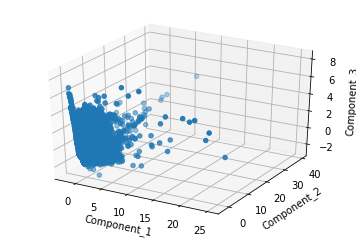

In [16]:
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111,projection = '3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel('Component_1')
ax_reduced_data.set_ylabel('Component_2')
ax_reduced_data.set_zlabel('Component_3')

### 2.聚类后的数据可视化

Text(0.5,0,'Component_3')

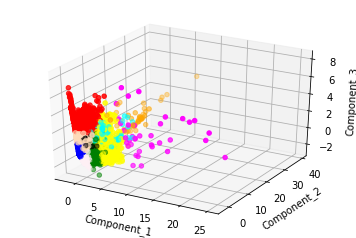

In [17]:
cluster_2_color = {0:'red',1:'green',2:'blue',3:'yellow',4:'cyan',
                  5:'black',6:'magenta',7:'#fff0f5',8:'#ffdab9',9:'#ffa500'}
colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)
fig_clustered_data = plt.figure()
ax_clustered_data = plt.subplot(111,projection = '3d')
ax_clustered_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values,c=colors_clustered_data)
ax_clustered_data.set_xlabel('Component_1')
ax_clustered_data.set_ylabel('Component_2')
ax_clustered_data.set_zlabel('Component_3')

### 3.筛选后的数据聚类可视化


Text(0.5,0,'Component_3')

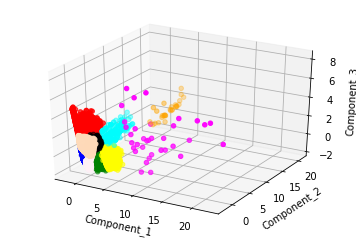

In [18]:
colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(result_data.pca_1.values,result_data.pca_2.values,result_data.pca_3.values,c=colors_filtered_data)
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')

In [19]:
### 4.每个聚类在pca_1,pca_2,pca_3上的均值的可视化 

### step 6. 用户分析

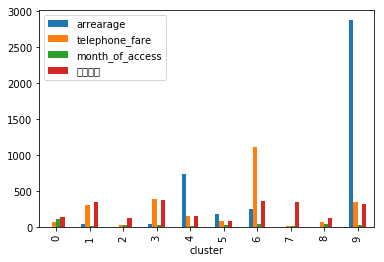

In [23]:
X_full['arrearage'] = X_full[u'欠费金额']
X_full['telephone_fare'] = X_full[u'每月话费']
X_full['month_of_access'] = X_full[u'入网时间']

X_full.groupby('cluster')[['arrearage','telephone_fare','month_of_access',u'套餐价格']].mean().plot(kind = 'bar')